<a href="https://colab.research.google.com/github/sovandash/ML_PROJECTS/blob/main/Ultrasound_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'/content/Ultrasound_1.csv')

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,...,NaN,0.5025,0.0128,0.0040,2.5391,0.0199,0.0117,0.0043,58.5665,1
1,3052.82,2525.33,2186.2667,1088.7359,1.2723,100.0,103.5633,0.1216,1.4891,-0.0007,...,131.2543,0.5003,0.0150,0.0043,2.9976,0.0228,0.0299,0.0105,131.2543,-1
2,2914.47,2492.14,2181.6111,1083.3937,1.2484,100.0,104.1478,0.1219,1.5568,-0.0214,...,NaN,0.4939,0.0136,0.0037,2.7633,0.0228,0.0299,0.0105,131.2543,-1
3,2959.86,2491.19,2208.0000,1835.9832,1.5714,100.0,100.2478,0.1239,1.4680,0.0033,...,128.2819,0.4993,0.0138,0.0038,2.7630,0.0140,0.0180,0.0054,128.2819,1
4,2964.77,2524.44,2181.5111,1177.0830,1.3012,100.0,100.9333,0.1216,1.4047,-0.0080,...,NaN,0.4984,0.0155,0.0040,3.1012,0.0140,0.0180,0.0054,128.2819,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Columns: 577 entries, 0 to Pass/Fail
dtypes: float64(576), int64(1)
memory usage: 6.9 MB


In [5]:
df['Pass/Fail'].value_counts()/len(df['Pass/Fail'])*100

-1    93.341788
 1     6.658212
Name: Pass/Fail, dtype: float64

In [6]:
df['Pass/Fail']=df['Pass/Fail'].map({-1:0,1:1})

In [7]:
df['Pass/Fail'].value_counts()

0    1472
1     105
Name: Pass/Fail, dtype: int64

In [8]:
df.isna().sum().sum()

42093

In [9]:
df.isna().sum()

0             5
1             7
2            14
3            14
4            14
             ..
586           0
587           0
588           0
589           0
Pass/Fail     0
Length: 577, dtype: int64

In [10]:
high_null=(df.isnull().sum()/len(df))*100

In [11]:
high_missing=high_null[high_null>0.70].index

In [12]:
high_missing

Index(['2', '3', '4', '5', '6', '40', '41', '72', '73', '75',
       ...
       '564', '565', '566', '567', '568', '569', '578', '579', '580', '581'],
      dtype='object', length=127)

In [13]:
df.drop(high_missing,axis=1,inplace=True)

In [14]:
df.isnull().sum()

0            5
1            7
7            9
8            2
9            2
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 450, dtype: int64

In [15]:
df.fillna(df.median(),inplace=True)

In [16]:
df.isna().sum().sum()

0

we can drop all the columns who have same value as it does not add any information to the dataset,therefore does not contribute to the analysis.


In [17]:
const_col=df.loc[:,df.nunique()==1]

In [18]:
df.drop(const_col,axis=1,inplace=True)

In [19]:
df.shape

(1577, 355)

In [20]:
Y=df.loc[:,'Pass/Fail']

In [21]:
X=df.drop('Pass/Fail',axis=1)

In [22]:
X.shape

(1577, 354)

In [23]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [24]:
scaler=MinMaxScaler()

In [25]:
X_scaled=scaler.fit_transform(X)

In [26]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [27]:
X_scaled.head()

,0,1,7,8,9,10,11,12,14,15,...,576,577,582,583,584,585,586,587,588,589
0,0.376148,0.291207,0.906716,0.565965,0.375682,0.393629,0.910747,0.179374,0.420461,0.142305,...,0.006871,0.006471,0.771875,0.014611,0.022505,0.013765,0.307435,0.110821,0.119565,0.079433
1,0.504934,0.533060,0.907463,0.640524,0.410756,0.296928,0.924712,0.229333,0.011441,0.160697,...,0.009061,0.083901,0.703125,0.019338,0.025440,0.018469,0.331662,0.348110,0.344203,0.178019
2,0.279281,0.484797,0.909701,0.785991,0.249415,0.348123,0.898907,0.226292,0.041284,0.164595,...,0.004566,0.116911,0.503125,0.016330,0.019569,0.016065,0.331662,0.348110,0.344203,0.178019
3,0.353313,0.483415,0.924627,0.595187,0.441933,0.417520,0.939587,0.163317,0.063380,0.175523,...,0.011762,0.108377,0.671875,0.016760,0.020548,0.016062,0.258145,0.192960,0.159420,0.173988
4,0.361322,0.531766,0.907463,0.459175,0.353858,0.440273,0.933819,0.149313,0.547025,0.151890,...,0.002694,0.102326,0.643750,0.020413,0.022505,0.019532,0.258145,0.192960,0.159420,0.173988


In [28]:
corr_matrix=X_scaled.corr(method='spearman')

In [29]:
corr_matrix

,0,1,7,8,9,10,11,12,14,15,...,576,577,582,583,584,585,586,587,588,589
0,1.000000,-0.174254,0.002752,-0.066828,0.024701,-0.008397,0.065179,-0.000054,0.006828,-0.007177,...,0.034483,-0.023146,0.019573,-0.020495,-0.023895,-0.020311,0.013071,-0.009036,-0.012880,-0.022351
1,-0.174254,1.000000,0.014045,0.034055,0.025961,0.022249,-0.030527,0.052083,-0.041578,-0.027321,...,0.004398,-0.031562,0.034954,0.031354,0.010121,0.030342,-0.011229,0.019134,0.005577,0.013544
7,0.002752,0.014045,1.000000,-0.042485,-0.015409,0.001062,0.040668,-0.053918,0.029223,-0.016398,...,0.000374,0.046552,-0.050490,-0.024173,-0.047482,-0.022231,0.058340,-0.022118,-0.023402,-0.078078
8,-0.066828,0.034055,-0.042485,1.000000,-0.142515,0.066201,-0.101125,-0.010753,-0.094035,-0.088006,...,0.077082,-0.061446,-0.016622,-0.008339,-0.003824,-0.007609,0.006057,0.048744,0.053185,0.010057
9,0.024701,0.025961,-0.015409,-0.142515,1.000000,-0.066209,0.028152,-0.039818,-0.020907,-0.011178,...,0.067400,0.002489,0.038839,-0.035584,-0.008223,-0.036130,0.015694,0.045708,0.044424,-0.000276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,-0.020311,0.030342,-0.022231,-0.007609,-0.036130,0.029054,-0.003990,-0.014588,0.012364,0.033661,...,-0.025409,-0.028586,0.005726,0.999601,0.895902,1.000000,-0.019582,0.012017,0.020354,0.039165
586,0.013071,-0.011229,0.058340,0.006057,0.015694,0.015137,0.012690,0.076761,-0.060133,0.015227,...,0.028346,0.032950,-0.023905,-0.020187,-0.022131,-0.019582,1.000000,0.051010,0.035499,-0.579792
587,-0.009036,0.019134,-0.022118,0.048744,0.045708,0.066190,0.002305,-0.051632,0.022806,0.033086,...,0.028369,0.009631,-0.023467,0.011613,0.017563,0.012017,0.051010,1.000000,0.975170,0.591619
588,-0.012880,0.005577,-0.023402,0.053185,0.044424,0.061754,-0.005990,-0.042973,0.019551,0.030775,...,0.022087,0.005590,-0.018467,0.020245,0.026282,0.020354,0.035499,0.975170,1.000000,0.593667


<Axes: >

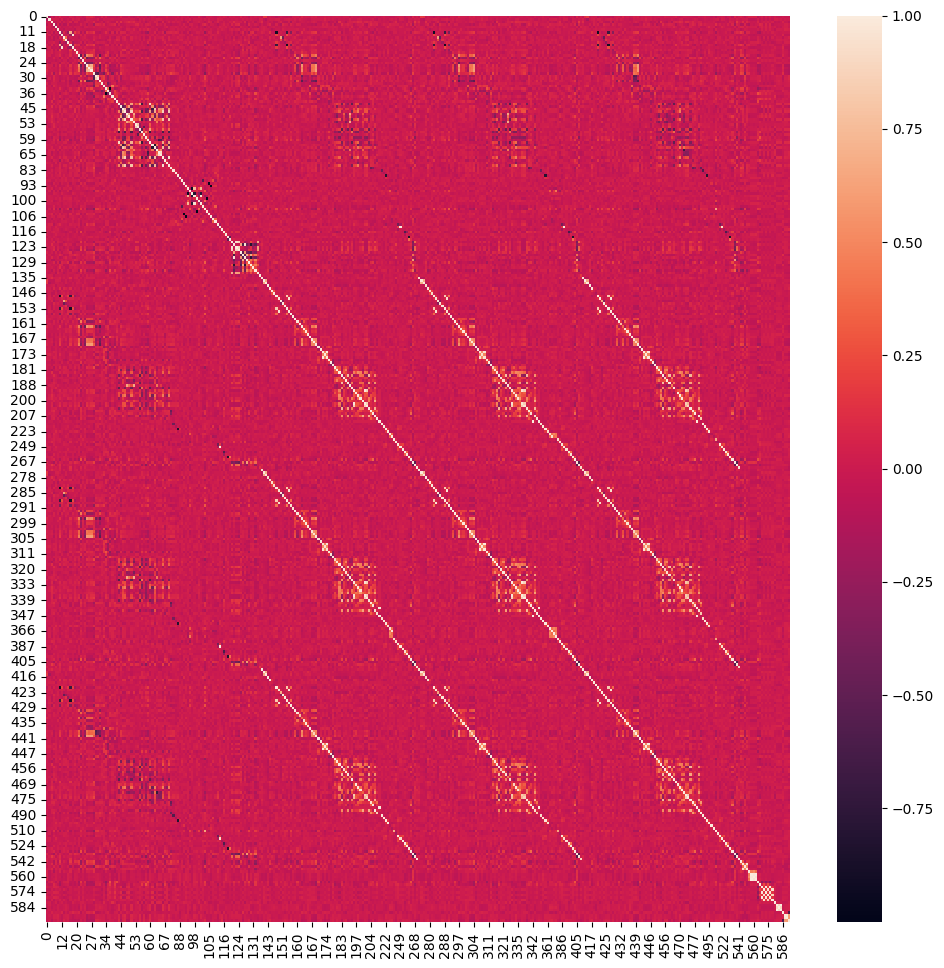

In [30]:
plt.figure(figsize=(12,12),dpi=100)
sns.heatmap(corr_matrix)

In [31]:
upper_corr_mat=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

In [32]:
upper_corr_mat

,0,1,7,8,9,10,11,12,14,15,...,576,577,582,583,584,585,586,587,588,589
0,NaN,-0.174254,0.002752,-0.066828,0.024701,-0.008397,0.065179,-0.000054,0.006828,-0.007177,...,0.034483,-0.023146,0.019573,-0.020495,-0.023895,-0.020311,0.013071,-0.009036,-0.012880,-0.022351
1,NaN,NaN,0.014045,0.034055,0.025961,0.022249,-0.030527,0.052083,-0.041578,-0.027321,...,0.004398,-0.031562,0.034954,0.031354,0.010121,0.030342,-0.011229,0.019134,0.005577,0.013544
7,NaN,NaN,NaN,-0.042485,-0.015409,0.001062,0.040668,-0.053918,0.029223,-0.016398,...,0.000374,0.046552,-0.050490,-0.024173,-0.047482,-0.022231,0.058340,-0.022118,-0.023402,-0.078078
8,NaN,NaN,NaN,NaN,-0.142515,0.066201,-0.101125,-0.010753,-0.094035,-0.088006,...,0.077082,-0.061446,-0.016622,-0.008339,-0.003824,-0.007609,0.006057,0.048744,0.053185,0.010057
9,NaN,NaN,NaN,NaN,NaN,-0.066209,0.028152,-0.039818,-0.020907,-0.011178,...,0.067400,0.002489,0.038839,-0.035584,-0.008223,-0.036130,0.015694,0.045708,0.044424,-0.000276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.019582,0.012017,0.020354,0.039165
586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051010,0.035499,-0.579792
587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.975170,0.591619
588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.593667


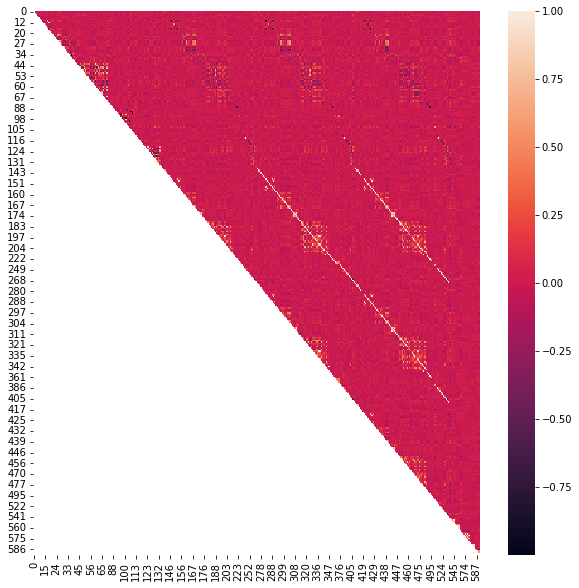

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(upper_corr_mat)
plt.show()

In [40]:
positive_corr=[column for column in upper_corr_mat.columns if any(upper_corr_mat[column]>=0.8)]

In [43]:
negative_corr=[column for column in upper_corr_mat.columns if any(upper_corr_mat[column]<=-0.8)]

In [44]:
negative_corr

['36',
 '62',
 '96',
 '98',
 '104',
 '105',
 '106',
 '130',
 '147',
 '153',
 '222',
 '254',
 '282',
 '288',
 '360',
 '392',
 '420',
 '426',
 '494',
 '526']

In [49]:
X_scaled.drop(positive_corr+negative_corr,axis=1,inplace=True)